## Librerías

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

### URL de extracción y PATH(donde está ubicado el driver para abrir el buscador)

In [2]:
urls = [ 
    'https://www.youtube.com/channel/UCufpgYibos8dDFDms5SHxJg/videos'
] 
PATH = "C:\Program Files (x86)\chromedriver.exe"

### Con función *main()*

#### Creamos una función que nos extraiga los datos que necesitamos y finalmente la podamos ejecutar

In [3]:
def main():
    #Damos dirección al webdriver donde se encuentra instalado Chrome por medio de la variable PATH
    driver = webdriver.Chrome(PATH)
    for url in urls:
        #El driver abrirá y controlará remotamente la página donde se extraerán los datos
        driver.get('https://www.youtube.com/channel/UCufpgYibos8dDFDms5SHxJg/videos'.format(url))
        # Le damos instrucciones para codificar la pagina y nos pueda mostrar los resultados que leerá del contenido lxml
        content = driver.page_source.encode('utf-8').strip()
        soup = BeautifulSoup(content, 'lxml') 
        # Extraer título
        titles = soup.findAll('a', id='video-title') 
        # Extraer views
        views = soup.findAll('span', class_='style-scope ytd-grid-video-renderer') 
        # Extraer fecha de publicación
        video_urls = soup.findAll('a', id='video-title') 
        # Imprimimos el canal con formato URL para poder acceder dando click desde aquí
        print('Channel: {}'.format(url)) 
        # Variables para controlar el tamaño o la cantidad de información que extraeremos de la página
        i = 0 
        j = 0 
        # Bucle para imprimir cada elemento extraído y ordenado del más reciente al límite establecido, en este caso el elemento 20
        for title in titles[:20]: 
            print('\n{}\t{}\t{}\thttps://www.youtube.com{}'.format(title.text, 
                                                                   views[i].text,views[i+1].text,video_urls[j].get('href'))) 
            i += 2
            j += 1
  
    #Ejecutamos la función
main() 

Channel: https://www.youtube.com/channel/UCufpgYibos8dDFDms5SHxJg/videos

Sin Libros #17 Pablo Salum (Ley Antisectas)	1,466 vistas	hace 10 horas	https://www.youtube.com/watch?v=EcAoZ9vlGq8

Herejes el Podcast Sin Libros #16 Tato Alexander	5,986 vistas	hace 1 semana	https://www.youtube.com/watch?v=5ytJClj7TC0

Herejes el podcast Sin Libros #15 Nicho Peñavera	6,996 vistas	hace 2 semanas	https://www.youtube.com/watch?v=junnkQrxNtc

Herejes El Podcast Sin Libros #14 Ruffinelli	3,976 vistas	hace 3 semanas	https://www.youtube.com/watch?v=1d_Iq54tLok

Herejes y la Mesa Redonda Con Patreons #1	4,366 vistas	Transmitido hace 3 semanas	https://www.youtube.com/watch?v=aMy3rNPhGP4

Herejes el Podcast Sin Libros #13 Ricardo O'Farrill	15,649 vistas	hace 4 semanas	https://www.youtube.com/watch?v=Num5GB2-zzo

Sin Libros #12 Silvia Ortega Hadad (activista Pro Derechos de la Maternidad y la infancia)	3,070 vistas	hace 1 mes	https://www.youtube.com/watch?v=-9ffK9FHbtM

Hellmail #5 con Juan Zapata	998 vist

### Sin funcion *main()*

#### Al extraer los datos podemos ordenarlos en un DataFrame para observarlos mejor y posteriormente procesarlos

In [6]:
driver = webdriver.Chrome(PATH) 
for url in urls: 
    driver.get('https://www.youtube.com/channel/UCufpgYibos8dDFDms5SHxJg/videos'.format(url)) 
    content = driver.page_source.encode('utf-8').strip() 
    soup = BeautifulSoup(content, 'lxml') 
    titles = soup.findAll('a', id='video-title') 
    views = soup.findAll( 'span', class_='style-scope ytd-grid-video-renderer') 
    video_urls = soup.findAll('a', id='video-title') 
    print('Channel: {}'.format(url))
    print ('Complete...')
    i = -2
    j = 0 
    # Creamos listas vacías para que aquí se almacenen nuestros elementos extraídos
    titulos=[]
    # Cada una tiene un nombre específico para cada elemento
    vistas=[]
    subidas=[]
    link=[]
    #Posteriormente, durante el bucle, añadiremos los elementos uno por uno a su lista correspondiente
    for title in titles[:20]:
        i+=2
        j += 1
        titulos.append(title.text)
        vistas.append(views[i].text)
        subidas.append(views[i+1].text)
        link.append(video_urls[j].get('href'))

Channel: https://www.youtube.com/channel/UCufpgYibos8dDFDms5SHxJg/videos


Creando el *DataFrame*

La variable *elements* nos crea una tupla, es decir, un conjunto de listas para poder transformarlas en un único DataFrame con pandas llamado df

In [48]:
elements = list(zip(titulos,vistas, subidas, link))
df = pd.DataFrame(elements, columns=['titulos','# vistas','publicado','links'])
df

,titulos,# vistas,publicado,links
0,Sin Libros #17 Pablo Salum (Ley Antisectas),"1,509 vistas",hace 10 horas,/watch?v=5ytJClj7TC0
1,Herejes el Podcast Sin Libros #16 Tato Alexander,"5,986 vistas",hace 1 semana,/watch?v=junnkQrxNtc
2,Herejes el podcast Sin Libros #15 Nicho Peñavera,"6,996 vistas",hace 2 semanas,/watch?v=1d_Iq54tLok
3,Herejes El Podcast Sin Libros #14 Ruffinelli,"3,978 vistas",hace 3 semanas,/watch?v=aMy3rNPhGP4
4,Herejes y la Mesa Redonda Con Patreons #1,"4,369 vistas",Transmitido hace 3 semanas,/watch?v=Num5GB2-zzo
5,Herejes el Podcast Sin Libros #13 Ricardo O'Fa...,"15,651 vistas",hace 4 semanas,/watch?v=-9ffK9FHbtM
6,Sin Libros #12 Silvia Ortega Hadad (activista ...,"3,070 vistas",hace 1 mes,/watch?v=S8aQNWNSxg8
7,Hellmail #5 con Juan Zapata,998 vistas,Transmitido hace 1 mes,/watch?v=DHw4VZZtlO4
8,Sin Libros #11 Alonso Álvarez (Director de Cin...,"1,852 vistas",hace 1 mes,/watch?v=UhuZ8c3Vr0A
9,Sin Libros #10 Paty Bacelis,"5,349 vistas",hace 1 mes,/watch?v=uo1IZsTl-hM


#### Limpiando los datos que contiene la columna *# vistas*

* Convertimos de object a string
* Reemplazamos la palabra "vistas"
* Removemos la coma de los números
* Eliminamos los espacios dentro de la cadena
* Convertimos a tipo numérico

In [49]:
df['# vistas']=df['# vistas'].astype('str')
df['# vistas'] = df['# vistas'].str.replace('vistas','')
df['# vistas'] = df['# vistas'].str.replace(',','')
df['# vistas'] = df['# vistas'].str.strip()
df['# vistas'] = pd.to_numeric(df['# vistas'])
df.head(3)

,titulos,# vistas,publicado,links
0,Sin Libros #17 Pablo Salum (Ley Antisectas),1509,hace 10 horas,/watch?v=5ytJClj7TC0
1,Herejes el Podcast Sin Libros #16 Tato Alexander,5986,hace 1 semana,/watch?v=junnkQrxNtc
2,Herejes el podcast Sin Libros #15 Nicho Peñavera,6996,hace 2 semanas,/watch?v=1d_Iq54tLok


In [50]:
df.dtypes

titulos      object
# vistas      int64
publicado    object
links        object
dtype: object

#### Guardamos en un CSV

In [52]:
df.to_csv('videos_herejes',header=True, index=False)

In [60]:
df['# vistas'].mean(), df['# vistas'].min(), df['# vistas'].max()

(8461.9, 998, 36495)

#### Menos visto

In [63]:
df[df['# vistas']==df['# vistas'].min()]

,titulos,# vistas,publicado,links
7,Hellmail #5 con Juan Zapata,998,Transmitido hace 1 mes,/watch?v=DHw4VZZtlO4


#### Más visto

In [62]:
df[df['# vistas']==df['# vistas'].max()]

,titulos,# vistas,publicado,links
12,Sin Libros #8 Gabe Ruiz,36495,hace 2 meses,/watch?v=iBVwKZcr-Rc


In [55]:
df['# vistas'].median()

5315.0

(array([9., 6., 1., 0., 1., 1., 1., 0., 0., 1.]),
 array([  998. ,  4547.7,  8097.4, 11647.1, 15196.8, 18746.5, 22296.2,
        25845.9, 29395.6, 32945.3, 36495. ]),
 <BarContainer object of 10 artists>)

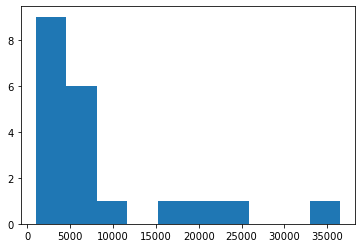

In [58]:
import matplotlib.pyplot as plot
plot.hist(df['# vistas'])